# Check dtag detection points

This notebook traces the sequence of dtag click detection and cleaning.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
fb2019_analysis = Path("/Volumes/SSD_2TB/MURI/fb2019_analysis/")
fb2023_analysis = Path("/Volumes/SSD_2TB/MURI/fb2023_analysis/")

In [3]:
trial_idx = 10  # trial to check

## click_detection_uncleaned

These are outputs from `click_detection_batch_export.ipynb`.
- Google drive: [click_detection_uncleaned](https://drive.google.com/drive/u/1/folders/1fdL7usIoFHXwUgCSNR8SSWFQA5aOlkJk)
- Local: `fb2019_analysis/dtag/dtag_detection_uncleaned`

In [4]:
click_detection_uncleaned_path = fb2019_analysis / "dtag/dtag_detection_uncleaned"

In [5]:
click_detection_uncleaned_files = list(click_detection_uncleaned_path.glob("*_peaks.npy"))

In [6]:
uncleaned = np.load(click_detection_uncleaned_files[trial_idx], allow_pickle=True)

In [7]:
uncleaned.shape

(2, 2333)

## click_detection_cleaned

Cleaned from the above uncleaned click detection from NMF.

- Google drive: [click_detection_cleaned](https://drive.google.com/drive/u/1/folders/1J-P4_U-UNjXlOW7TraqxaituXAf4sXuv)
- Local: `fb2019_analysis/dtag/dtag_detection_cleaned`

In [8]:
click_detection_cleaned_path = fb2019_analysis / "dtag/dtag_detection_cleaned"

In [9]:
click_detection_cleaned_files = list(click_detection_cleaned_path.glob("*_peaks_cleaned.npy"))

In [10]:
cleaned = np.load(click_detection_cleaned_files[trial_idx], allow_pickle=True)

In [11]:
cleaned.shape

(2, 2199)

## Compare uncleaned and cleaned

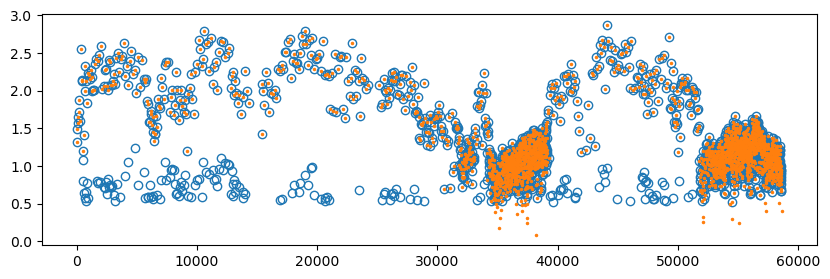

In [12]:
plt.figure(figsize=(10, 3))
plt.plot(uncleaned[0, :], uncleaned[1, :], 'o', markerfacecolor="none")
plt.plot(cleaned[0, :], cleaned[1, :], '.', markersize=3)
plt.show()

It appears that the `cleaned` points were the `uncleaned` points with one level of cleaning to remove some low SNR detections in earlier part of the trial and add some detections at the end of the trial.

## dtag_click_reclean_202104/points_unconverted

- Google drive: [dtag_click_reclean_202104/points_unconverted](https://drive.google.com/drive/u/1/folders/1J-P4_U-UNjXlOW7TraqxaituXAf4sXuv)
- Local: `dtag_reclean_202104/points_unconverted`

In [13]:
points_unconverted_path = fb2019_analysis / "dtag/dtag_reclean_202104/points_unconverted"

In [14]:
points_unconverted_files = list(points_unconverted_path.glob("*_peaks_cleaned.npy"))

In [15]:
points_unconverted = np.load(points_unconverted_files[trial_idx], allow_pickle=True)

In [16]:
points_unconverted.shape

(2, 2199)

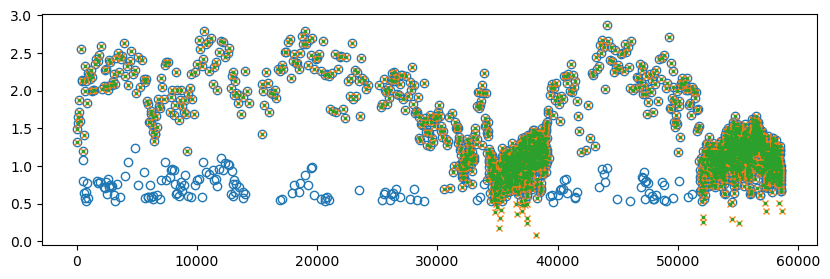

In [17]:
plt.figure(figsize=(10, 3))
plt.plot(uncleaned[0, :], uncleaned[1, :], 'o', markerfacecolor="none", label="uncleaned")
plt.plot(cleaned[0, :], cleaned[1, :], 'x', markersize=5, label="cleaned")
plt.plot(points_unconverted[0, :], points_unconverted[1, :], '.', markersize=3, label="points unconverted")
plt.show()

In [18]:
np.all(cleaned == points_unconverted)

True

In [19]:
points_unconverted[0, :10]

array([ 46.,  71., 101., 135., 178., 232., 292., 356., 420., 481.])

`dtag_reclean_202104/points_unconverted` is directly copied from `dtag_detection_cleaned`.

## dtag_detection_cleaned_refined

- Local: `fb2019_analysis/dtag/dtag_detection_cleaned_refined`

In [20]:
dtag_detection_cleaned_refined_path = fb2019_analysis / "dtag/dtag_detection_cleaned_refined"

In [21]:
dtag_detection_cleaned_refined_files = list(
    dtag_detection_cleaned_refined_path.glob("*_peaks_cleaned_refined.npy")
)

In [22]:
cleaned_refined = np.load(dtag_detection_cleaned_refined_files[trial_idx], allow_pickle=True)

In [23]:
cleaned_refined.shape

(1172,)

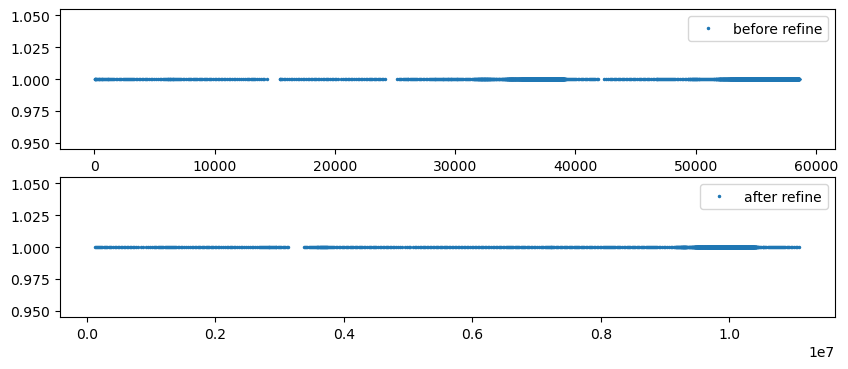

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 4))
ax[0].plot(cleaned[0, :], np.ones(cleaned.shape[1]),
           '.', markersize=3, label="before refine")
ax[0].legend()
ax[1].plot(cleaned_refined, np.ones(cleaned_refined.size),
           '.', markersize=3, label="after refine")
ax[1].legend()
plt.show()

`dtag_detection_cleaned_refined` were refined from `dtag_detection_cleaned` (=`dtag_reclean_202104/points_unconverted`).

## dtag_detection_cleaned_refined_npz

- Local: `fb2019_analysis/dtag/dtag_detection_cleaned_refined_npz`

In [25]:
dtag_detection_cleaned_refined_npz_path = fb2019_analysis / "dtag/dtag_detection_cleaned_refined_npz"

In [26]:
dtag_detection_cleaned_refined_npz_files = list(
    dtag_detection_cleaned_refined_npz_path.glob("*_peaks_cleaned_refined.npz")
)

In [27]:
cleaned_refined_npz = np.load(dtag_detection_cleaned_refined_npz_files[trial_idx], allow_pickle=True)

In [28]:
cleaned_refined_npz["location"].shape

(1, 1172)

In [29]:
cleaned_refined_npz["peak"].shape

(1, 1172)

In [30]:
np.all(cleaned_refined == cleaned_refined_npz["location"])

True

From `dtag_detection_cleaned_refined` to `dtag_detection_cleaned_refined_npz` is a simple conversion.

## dtag_click_reclean_202104/points_cleaned

- Google drive: [dtag_click_reclean_202104/points_cleaned](https://drive.google.com/drive/u/1/folders/1bXeMfGKWxVGPZf0bhOZVPZ1DHL9r22Jh)
- Local: `fb2019_analysis/dtag_reclean_202104/points_unconverted`

In [31]:
points_cleaned_path = fb2019_analysis / "dtag/dtag_reclean_202104/points_cleaned"

In [32]:
points_cleaned_files = list(points_cleaned_path.glob("*_dtag_cleaned.npz"))

In [33]:
points_cleaned = np.load(points_cleaned_files[trial_idx], allow_pickle=True)

In [34]:
points_cleaned["location"].shape

(1, 1171)

In [35]:
cleaned_refined_npz["peak"].shape

(1, 1172)

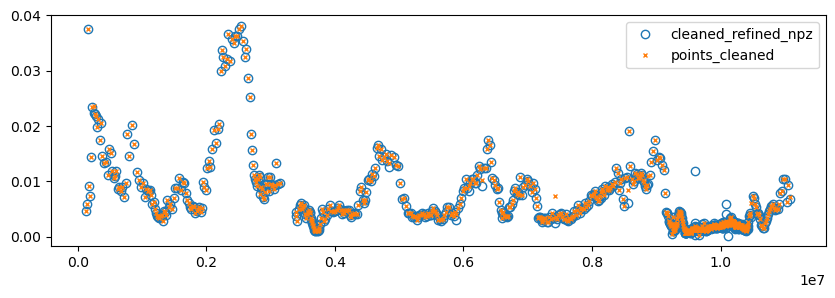

In [36]:
plt.figure(figsize=(10, 3))
plt.plot(cleaned_refined_npz["location"].squeeze(),
         cleaned_refined_npz["peak"].squeeze(),
         'o', markerfacecolor="none", label="cleaned_refined_npz")
plt.plot(points_cleaned["location"].squeeze(),
         points_cleaned["peak"].squeeze(),
         'x', markersize=3, label="points_cleaned")
plt.legend()
plt.show()

We can see that the `points_cleaned` points are "cleaner" compared to the `cleaned_refined_npz` points.